PCA (principal component analysis) Notebook: Blind Source Separation
-----

**PCA** derives an orthogonal projection to convert a given set of observations to linearly uncorrelated variables. 

The **PCA** projections are called principal components.

In [4]:
import NMFk
import Mads
import MultivariateStats
import Random

Random.seed!(2021)

MersenneTwister(2021)

Let us generate 3 random signals:

In [47]:
a = rand(15)
b = rand(15)
c = rand(15)
[a b c]

15×3 Matrix{Float64}:
 0.860058  0.79257    0.667827
 0.129417  0.896754   0.80214
 0.606864  0.938984   0.988657
 0.61451   0.495412   0.484634
 0.315644  0.799848   0.862744
 0.902302  0.493398   0.100729
 0.540887  0.130137   0.324375
 0.366676  0.633948   0.31323
 0.528002  0.698486   0.993112
 0.873795  0.69891    0.854419
 0.271846  0.816638   0.928391
 0.889989  0.533489   0.842207
 0.512928  0.969177   0.45409
 0.388955  0.474374   0.0699667
 0.183873  0.0757615  0.544287

The singals look like this:

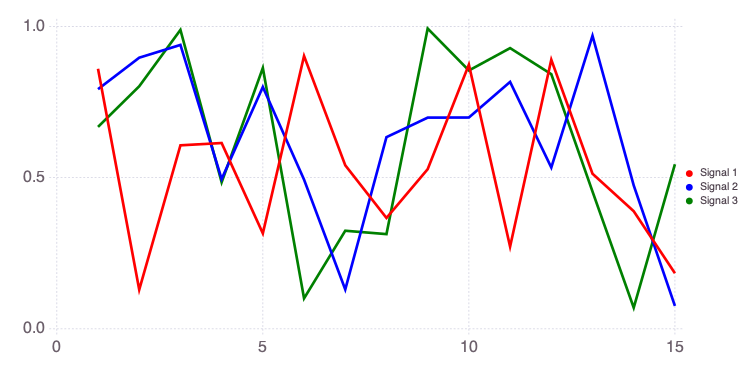

In [48]:
import Cairo
Mads.plotseries([a b c])

We can collect the 3 signal vectors into a signal matrix `W`:

In [49]:
W = [a b c]

15×3 Matrix{Float64}:
 0.860058  0.79257    0.667827
 0.129417  0.896754   0.80214
 0.606864  0.938984   0.988657
 0.61451   0.495412   0.484634
 0.315644  0.799848   0.862744
 0.902302  0.493398   0.100729
 0.540887  0.130137   0.324375
 0.366676  0.633948   0.31323
 0.528002  0.698486   0.993112
 0.873795  0.69891    0.854419
 0.271846  0.816638   0.928391
 0.889989  0.533489   0.842207
 0.512928  0.969177   0.45409
 0.388955  0.474374   0.0699667
 0.183873  0.0757615  0.544287

Now we can mix the signals in matrix `W` to produce a data matrix `X` representing data collected at 5 sensors (e.g., measurement devices or wells at different locations).

Each of the 5 sensors is observing some mixture of the signals in `W`.

The way the 3 signals are mixed at the sensors is represented by the mixing matrix `H`.

Let us define the mixing matrix `H` as:

In [50]:
H = [1 10 0 0 1; 0 1 1 5 2; 3 0 0 1 5]

3×5 Matrix{Int64}:
 1  10  0  0  1
 0   1  1  5  2
 3   0  0  1  5

Each column of the `H` matrix defines how the 3 signals are represented in each sensors.

For example, the first sensor (column 1 above) detects only Signals 1 and 3; Signal 2 is missing because `H[2,1]` is equal to zero.

The second sensor (column 2 above) detects Signals 1 and 2; Signal 3 is missing because `H[3,2]` is equal to zero.

The entries of `H` matrix also define the proportions at which the signals are mixed.

For example, the first sensor (column 1 above) detects Signal 3 times stronger than Signal 1.

The data matrix `X` is formed by multiplying `W` and `H` matrices. `X` defines the actual data observed.

In [51]:
X = W * H

15×5 Matrix{Float64}:
 2.86354   9.39315  0.79257    4.63068   5.78433
 2.53584   2.19092  0.896754   5.28591   5.93363
 3.57283   7.00762  0.938984   5.68358   7.42812
 2.06841   6.64051  0.495412   2.96169   4.0285
 2.90388   3.95629  0.799848   4.86198   6.22906
 1.20449   9.51642  0.493398   2.56772   2.39274
 1.51401   5.53901  0.130137   0.975061  2.42303
 1.30637   4.30071  0.633948   3.48297   3.20072
 3.50734   5.97851  0.698486   4.48554   6.89054
 3.43705   9.43686  0.69891    4.34897   6.54371
 3.05702   3.5351   0.816638   5.01158   6.54707
 3.41661   9.43338  0.533489   3.50965   6.168
 1.8752    6.09846  0.969177   5.29998   4.72173
 0.598855  4.36393  0.474374   2.44184   1.68754
 1.81673   1.91449  0.0757615  0.923095  3.05683

The data matrix `X` looks like this:

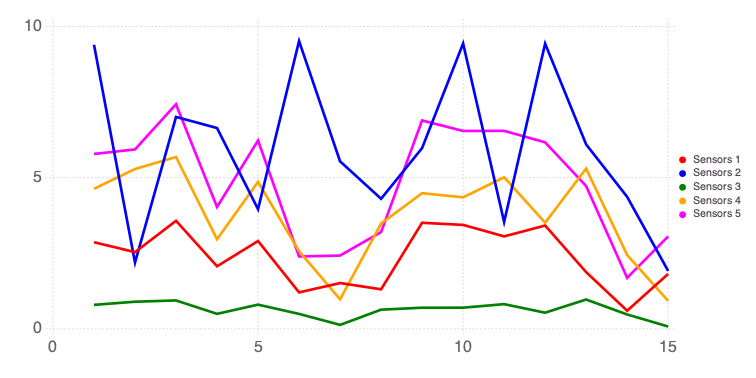

In [52]:
Mads.plotseries(X; name="Sensors")

## PCA Analysis

Train a PCA model, allowing up to 4 dimensions:

In [53]:
M = MultivariateStats.fit(MultivariateStats.PCA, X; maxoutdim=4)

PCA(indim = 15, outdim = 3, principalratio = 1.0)

**PCA** returns the estimated optimal number of signals `outdim` which in this case, as expected, is equal to 3.

principalratio, its kind of accuracy metric.


### Apply PCA model to testing set

In [54]:
Yte = MultivariateStats.transform(M, X)

3×5 Matrix{Float64}:
  4.65437   -11.3541     11.3627    -0.171637  -4.49135
 -0.064071   -4.77497    -2.81022    2.86361    4.78565
  1.61959    -0.0868062  -0.311782  -2.42263    1.20163

### Reconstruct testing observations (approximately)

In [58]:
Xr = MultivariateStats.reconstruct(M, Yte)
using Statistics
rmse_x = sqrt(sum((X .- Xr).^2))  # calculates the mse between true and predicted data

1.1529226449755443e-14

In [59]:
rmse_y = sqrt(sum((H .- Yte).^2))

26.776750695061406

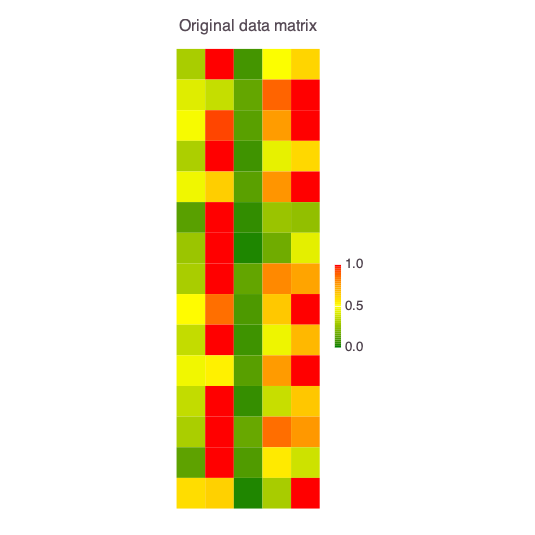

In [61]:
NMFk.plotmatrix(X ./ maximum(X; dims=2); title="Original data matrix")

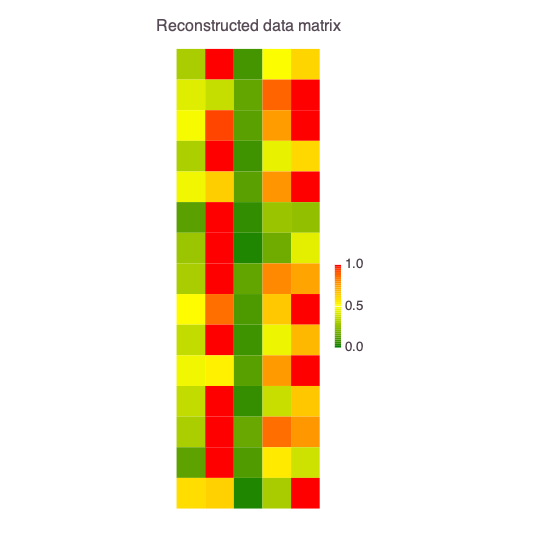

In [62]:
NMFk.plotmatrix(Xr ./ maximum(Xr; dims=2); title="Reconstructed data matrix")

### Conclusions
- PCI is not like `NMF` or `NMFk`; therefore, it does not reproduce mixture matrix `H`. Rather it produces principal components where 1st component has most variance followed by 2nd, 3rd and so on ...
- We can reproduce exact data matrix

### We can also plot each principal component